In [2]:
import pandas as pd

df = pd.read_csv('basket_analysis.csv',index_col=0)

print(df.head())

   Apple  Bread  Butter  Cheese   Corn   Dill   Eggs  Ice cream  Kidney Beans  \
0  False   True   False   False   True   True  False       True         False   
1  False  False   False   False  False  False  False      False         False   
2   True  False    True   False  False   True  False       True         False   
3  False  False    True    True  False   True  False      False         False   
4   True   True   False   False  False  False  False      False         False   

    Milk  Nutmeg  Onion  Sugar  Unicorn  Yogurt  chocolate  
0  False   False  False   True    False    True       True  
1   True   False  False  False    False   False      False  
2   True   False  False  False    False    True       True  
3   True    True   True  False    False   False      False  
4  False   False  False  False    False   False      False  


In [4]:
# Nettoyer les donnees

# Afficher les infos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         999 non-null    bool 
 1   Bread         999 non-null    bool 
 2   Butter        999 non-null    bool 
 3   Cheese        999 non-null    bool 
 4   Corn          999 non-null    bool 
 5   Dill          999 non-null    bool 
 6   Eggs          999 non-null    bool 
 7   Ice cream     999 non-null    bool 
 8   Kidney Beans  999 non-null    bool 
 9   Milk          999 non-null    bool 
 10  Nutmeg        999 non-null    bool 
 11  Onion         999 non-null    bool 
 12  Sugar         999 non-null    bool 
 13  Unicorn       999 non-null    bool 
 14  Yogurt        999 non-null    bool 
 15  chocolate     999 non-null    bool 
dtypes: bool(16)
memory usage: 23.4 KB
None


In [7]:
# Vérifier le nombre de valeurs manquantes par colonne
print(df.isnull().sum())


Unnamed: 0      0
Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64


In [8]:
# Supprimer toutes les lignes avec valeurs manquantes
df_clean = df.dropna()

# Supprimer les doublons
df_clean = df_clean.drop_duplicates()
print(df_clean)

     Apple  Bread  Butter  Cheese   Corn   Dill   Eggs  Ice cream  \
0    False   True   False   False   True   True  False       True   
1    False  False   False   False  False  False  False      False   
2     True  False    True   False  False   True  False       True   
3    False  False    True    True  False   True  False      False   
4     True   True   False   False  False  False  False      False   
..     ...    ...     ...     ...    ...    ...    ...        ...   
994  False   True   False   False  False  False   True      False   
995   True  False   False   False   True  False  False      False   
996   True  False   False   False   True   True  False      False   
997  False  False    True    True   True  False   True       True   
998  False  False   False   False  False  False  False      False   

     Kidney Beans   Milk  Nutmeg  Onion  Sugar  Unicorn  Yogurt  chocolate  
0           False  False   False  False   True    False    True       True  
1           False

In [10]:
# Afficher à nouveau les infos pour vérifier le nettoyage
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         920 non-null    bool 
 1   Bread         920 non-null    bool 
 2   Butter        920 non-null    bool 
 3   Cheese        920 non-null    bool 
 4   Corn          920 non-null    bool 
 5   Dill          920 non-null    bool 
 6   Eggs          920 non-null    bool 
 7   Ice cream     920 non-null    bool 
 8   Kidney Beans  920 non-null    bool 
 9   Milk          920 non-null    bool 
 10  Nutmeg        920 non-null    bool 
 11  Onion         920 non-null    bool 
 12  Sugar         920 non-null    bool 
 13  Unicorn       920 non-null    bool 
 14  Yogurt        920 non-null    bool 
 15  chocolate     920 non-null    bool 
dtypes: bool(16)
memory usage: 21.6 KB
None


In [12]:
# Statistiques descriptives de toutes les colonnes numériques
print(df_clean.describe())

        Apple  Bread Butter Cheese   Corn   Dill   Eggs Ice cream  \
count     920    920    920    920    920    920    920       920   
unique      2      2      2      2      2      2      2         2   
top     False  False  False  False  False  False  False     False   
freq      548    547    505    532    523    537    545       522   

       Kidney Beans   Milk Nutmeg  Onion  Sugar Unicorn Yogurt chocolate  
count           920    920    920    920    920     920    920       920  
unique            2      2      2      2      2       2      2         2  
top           False  False  False  False  False   False  False     False  
freq            523    519    529    525    519     544    512       509  


chocolate       421
Butter          420
Yogurt          420
Ice cream       410
Sugar           409
Kidney Beans    408
Corn            407
Milk            405
Cheese          404
Onion           403
Nutmeg          401
Dill            398
Unicorn         389
Bread           384
Eggs            384
Apple           383
dtype: int64


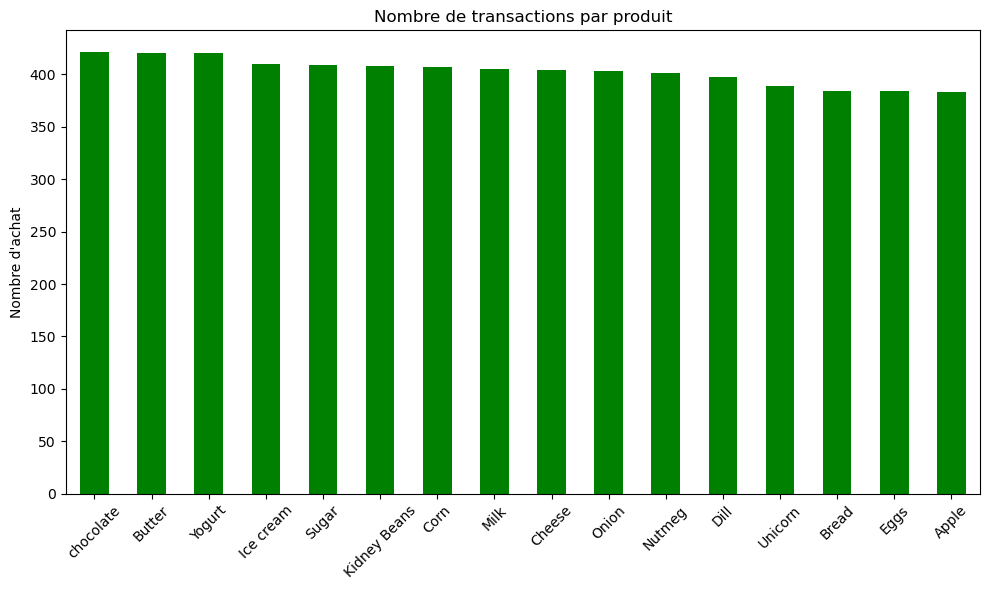

In [22]:
# Calcul du nombre d’achats pour chaque produit
achats_par_produit = df.sum().sort_values(ascending=False)
print(achats_par_produit)

import matplotlib.pyplot as plt
import seaborn as sns

# Barres : nombre d’achats par produit
plt.figure(figsize=(10,6))
achats_par_produit.plot(kind='bar', color='green')
plt.title('Nombre de transactions par produit')
plt.ylabel('Nombre d\'achat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

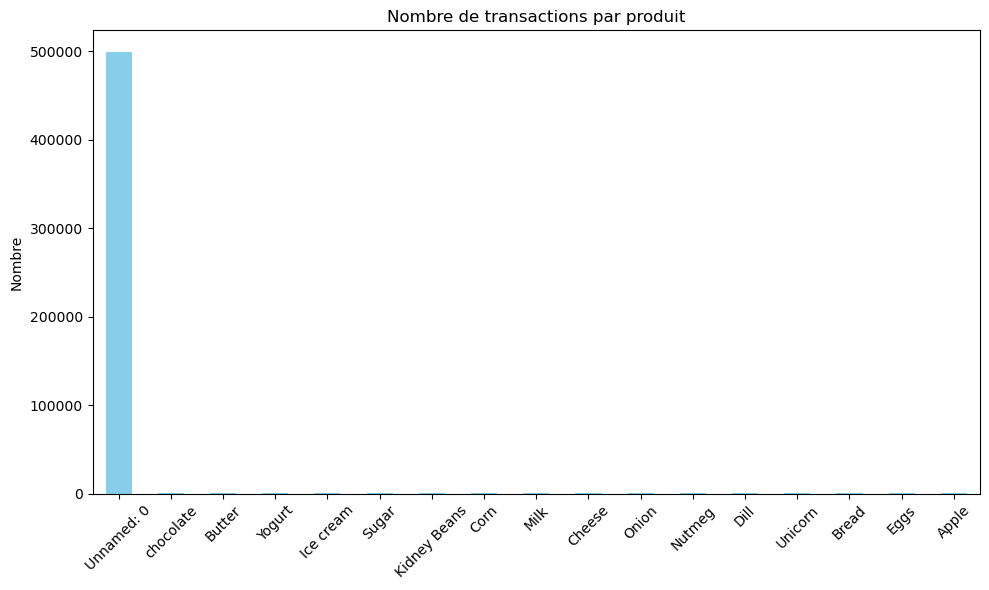

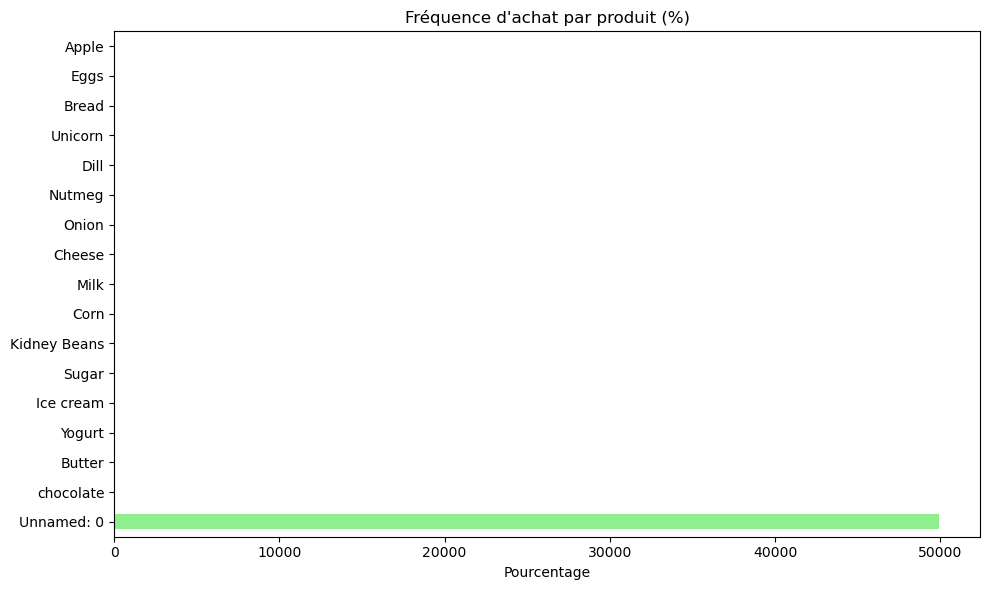

In [23]:
# Fréquence en pourcentage
frequence = df.mean().sort_values(ascending=False) * 100
print(frequence)

# Barres horizontales : fréquence des produits
plt.figure(figsize=(10,6))
frequence.plot(kind='barh', color='lightgreen')
plt.title('Fréquence d\'achat par produit (%)')
plt.xlabel('Pourcentage')
plt.tight_layout()
plt.show()


In [24]:
print("Nombre total de transactions :", len(df))
print("Nombre total de produits :", len(df.columns))


Nombre total de transactions : 999
Nombre total de produits : 16
